In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data collection

In [4]:
now = datetime.now()

ticker = 'AAPL'
start= datetime(now.year-10, now.month, now.day)
end = now
df = yf.download(ticker, start, end, auto_adjust=False)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-07-01,28.354206,31.650000,31.735001,31.497499,31.725000,120955200
2015-07-02,28.318365,31.610001,31.672501,31.442499,31.607500,108844000
2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600
2015-07-07,28.150394,31.422501,31.537500,30.942499,31.472500,187787200
2015-07-08,27.451612,30.642500,31.160000,30.635000,31.120001,243046400
...,...,...,...,...,...,...
2025-06-25,201.559998,201.559998,203.669998,200.619995,201.449997,39525700
2025-06-26,201.000000,201.000000,202.639999,199.460007,201.429993,50799100


In [5]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-07-01,28.354206,31.650000,31.735001,31.497499,31.725000,120955200
2015-07-02,28.318365,31.610001,31.672501,31.442499,31.607500,108844000
2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600
2015-07-07,28.150394,31.422501,31.537500,30.942499,31.472500,187787200
2015-07-08,27.451612,30.642500,31.160000,30.635000,31.120001,243046400


In [6]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2025-06-25,201.559998,201.559998,203.669998,200.619995,201.449997,39525700
2025-06-26,201.000000,201.000000,202.639999,199.460007,201.429993,50799100
2025-06-27,201.080002,201.080002,203.220001,200.000000,201.889999,73188600
2025-06-30,205.169998,205.169998,207.389999,199.259995,202.009995,91612700
2025-07-01,207.869995,207.869995,210.186493,206.140106,206.664993,63445815


# 2. Data exploration

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(2515, 6)

In [9]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [10]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,103.300249,105.456817,106.514394,104.283860,105.355575,1.097799e+08
std,68.884053,68.469014,69.142274,67.704724,68.391973,6.444179e+07
min,20.647455,22.584999,22.917500,22.367500,22.500000,2.323470e+07
25%,38.939798,41.272501,41.828749,40.837500,41.235001,6.683560e+07
50%,88.485008,91.027496,91.839996,89.629997,91.000000,9.440320e+07
75%,163.529366,165.824997,167.815002,164.369995,165.755005,1.335778e+08
max,258.396667,259.019989,260.100006,257.630005,258.190002,6.488252e+08


In [11]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [12]:
df = df.reset_index()

In [13]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-07-01,28.354206,31.650000,31.735001,31.497499,31.725000,120955200
1,2015-07-02,28.318365,31.610001,31.672501,31.442499,31.607500,108844000
2,2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600
3,2015-07-07,28.150394,31.422501,31.537500,30.942499,31.472500,187787200
4,2015-07-08,27.451612,30.642500,31.160000,30.635000,31.120001,243046400


Text(0, 0.5, 'Close price')

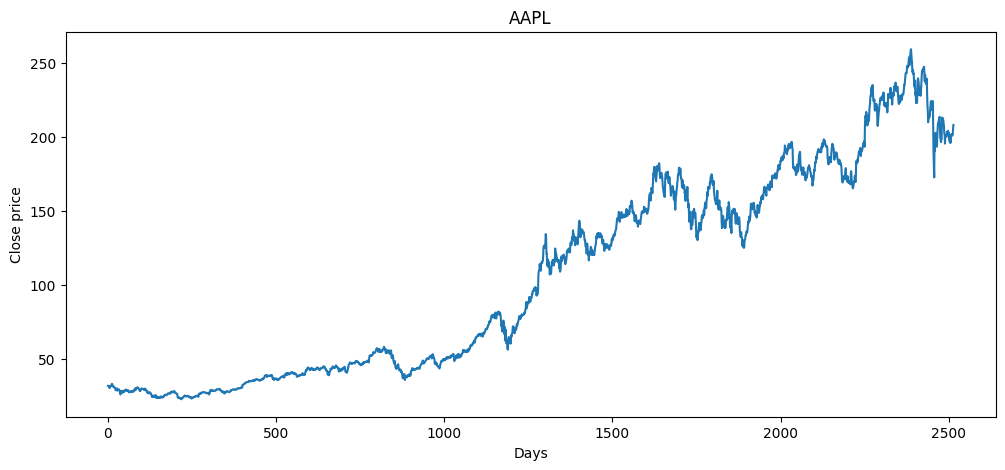

In [14]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3. Feature engineering

### 100 Days mooving average

In [15]:
df[('MA_100', ticker)] = df[('Close', ticker)].rolling(100).mean()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-07-01,28.354206,31.650000,31.735001,31.497499,31.725000,120955200,NaN
1,2015-07-02,28.318365,31.610001,31.672501,31.442499,31.607500,108844000,NaN
2,2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600,NaN
3,2015-07-07,28.150394,31.422501,31.537500,30.942499,31.472500,187787200,NaN
4,2015-07-08,27.451612,30.642500,31.160000,30.635000,31.120001,243046400,NaN


In [16]:
df.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
2510,2025-06-25,201.559998,201.559998,203.669998,200.619995,201.449997,39525700,213.5816
2511,2025-06-26,201.000000,201.000000,202.639999,199.460007,201.429993,50799100,213.2316
2512,2025-06-27,201.080002,201.080002,203.220001,200.000000,201.889999,73188600,212.9623
2513,2025-06-30,205.169998,205.169998,207.389999,199.259995,202.009995,91612700,212.6860
2514,2025-07-01,207.869995,207.869995,210.186493,206.140106,206.664993,63445815,212.4400


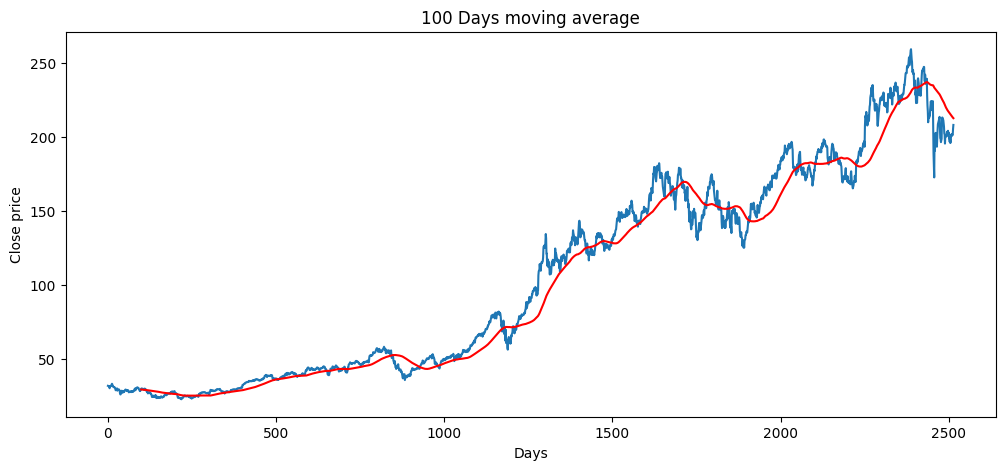

In [17]:
plt.figure(figsize = (12,5));
plt.plot(df.Close);
plt.title('100 Days moving average');
plt.xlabel('Days');
plt.ylabel('Close price');
plt.plot(df['MA_100'], 'r');

### 200 Days mooving average

In [18]:
df[('MA_200', ticker)] = df[('Close', ticker)].rolling(200).mean()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-07-01,28.354206,31.650000,31.735001,31.497499,31.725000,120955200,NaN,NaN
1,2015-07-02,28.318365,31.610001,31.672501,31.442499,31.607500,108844000,NaN,NaN
2,2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600,NaN,NaN
3,2015-07-07,28.150394,31.422501,31.537500,30.942499,31.472500,187787200,NaN,NaN
4,2015-07-08,27.451612,30.642500,31.160000,30.635000,31.120001,243046400,NaN,NaN


In [19]:
df.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
2510,2025-06-25,201.559998,201.559998,203.669998,200.619995,201.449997,39525700,213.5816,223.53170
2511,2025-06-26,201.000000,201.000000,202.639999,199.460007,201.429993,50799100,213.2316,223.43260
2512,2025-06-27,201.080002,201.080002,203.220001,200.000000,201.889999,73188600,212.9623,223.33345
2513,2025-06-30,205.169998,205.169998,207.389999,199.259995,202.009995,91612700,212.6860,223.25875
2514,2025-07-01,207.869995,207.869995,210.186493,206.140106,206.664993,63445815,212.4400,223.18480


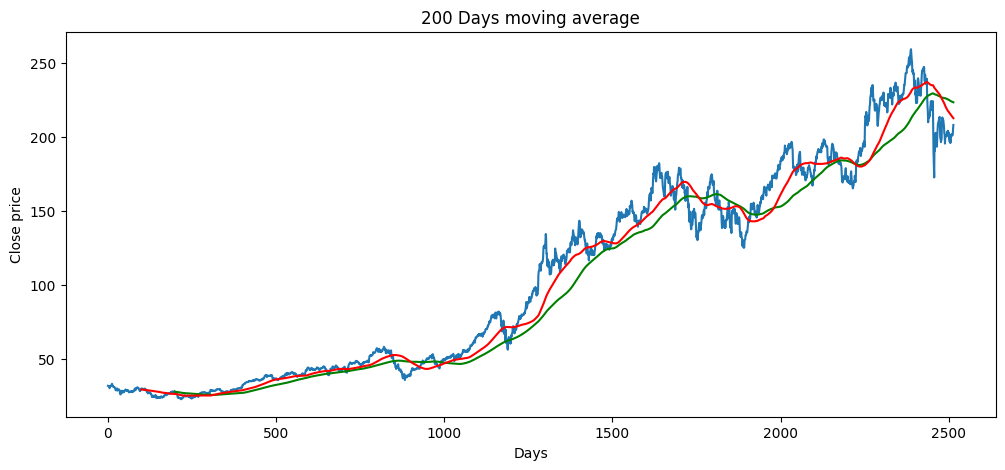

In [20]:
plt.figure(figsize = (12,5));
plt.plot(df.Close);
plt.title('200 Days moving average');
plt.xlabel('Days');
plt.ylabel('Close price');
plt.plot(df['MA_200'], 'g');
plt.plot(df['MA_100'], 'r');

### Calculating % change in each trading session

In [21]:
df[('Percentage change', ticker)] = df[('Close', ticker)].pct_change()
df[[('Close',ticker), ('Percentage change', ticker)]]

Price,Close,Percentage change
Ticker,AAPL,AAPL
0,31.650000,NaN
1,31.610001,-0.001264
2,31.500000,-0.003480
3,31.422501,-0.002460
4,30.642500,-0.024823
...,...,...
2510,201.559998,0.006291
2511,201.000000,-0.002778
2512,201.080002,0.000398


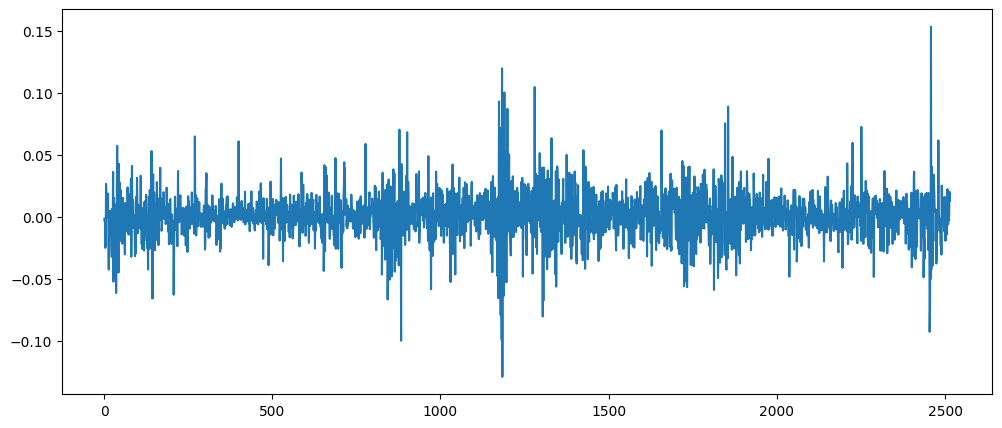

In [22]:
plt.figure(figsize = (12,5));
plt.plot(df['Percentage change']);

# 4. Data preprocessing

In [23]:
df.shape

(2515, 10)

### Splitting data into training and testing datasets

In [24]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        31.650000
1        31.610001
2        31.500000
3        31.422501
4        30.642500
...            ...
1755    135.869995
1756    135.350006
1757    138.270004
1758    141.660004
1759    141.660004

[1760 rows x 1 columns]
Ticker        AAPL
1760    137.440002
1761    139.229996
1762    136.720001
1763    138.929993
1764    141.559998
...            ...
2510    201.559998
2511    201.000000
2512    201.080002
2513    205.169998
2514    207.869995

[755 rows x 1 columns]


In [91]:
# Scaling down the data between 0 and 1
data_training

Ticker,AAPL
0,31.650000
1,31.610001
2,31.500000
3,31.422501
4,30.642500
...,...
1755,135.869995
1756,135.350006
1757,138.270004
1758,141.660004


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [101]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0568606 ],
       [0.0566097 ],
       [0.05591972],
       ...,
       [0.72563907],
       [0.74690298],
       [0.74690298]])

# 5. Sequence Creation

In [107]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i])

x_train, y_train = np.array(x_train), np.array(y_train)
y_train = np.squeeze(y_train)

In [98]:
x_train

array([[[0.0568606 ],
        [0.0566097 ],
        [0.05591972],
        ...,
        [0.03661597],
        [0.04226126],
        [0.04459778]],

       [[0.0566097 ],
        [0.05591972],
        [0.0554336 ],
        ...,
        [0.04226126],
        [0.04459778],
        [0.04541322]],

       [[0.05591972],
        [0.0554336 ],
        [0.05054101],
        ...,
        [0.04459778],
        [0.04541322],
        [0.0429826 ]],

       ...,

       [[0.92673675],
        [0.95464955],
        [0.95358323],
        ...,
        [0.68355027],
        [0.71058491],
        [0.70732326]],

       [[0.95464955],
        [0.95358323],
        [0.96129843],
        ...,
        [0.71058491],
        [0.70732326],
        [0.72563907]],

       [[0.95358323],
        [0.96129843],
        [0.94285714],
        ...,
        [0.70732326],
        [0.72563907],
        [0.74690298]]])

In [108]:
y_train

array([0.04541322, 0.0429826 , 0.04475459, ..., 0.72563907, 0.74690298,
       0.74690298])

In [52]:
x_train.ndim

3

In [53]:
y_train.ndim

2

In [54]:
x_train.shape

(1660, 100, 1)

In [109]:
y_train.shape

(1660,)

# 6. Model building

In [56]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [57]:
# ML model
from tensorflow.keras.models import Sequential

In [58]:
from tensorflow.keras.layers import Dense, LSTM, Input

In [110]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model training

In [111]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0274
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 6.3587e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.3852e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 5.9374e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.9447e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.7939e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.8527e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.6344e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.7518e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.3903e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.2339e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.9601e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.1856e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.2231e-04
Epoch 15/50
52/52 ━

In [112]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [158]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing test data

In [113]:
data_testing

Ticker,AAPL
1760,137.440002
1761,139.229996
1762,136.720001
1763,138.929993
1764,141.559998
...,...
2510,201.559998
2511,201.000000
2512,201.080002
2513,205.169998


In [114]:
data_training

Ticker,AAPL
0,31.650000
1,31.610001
2,31.500000
3,31.422501
4,30.642500
...,...
1755,135.869995
1756,135.350006
1757,138.270004
1758,141.660004


In [115]:
past_100_days = data_training.tail(100)

In [116]:
past_100_days

Ticker,AAPL
1660,175.839996
1661,172.899994
1662,172.389999
1663,171.660004
1664,174.830002
...,...
1755,135.869995
1756,135.350006
1757,138.270004
1758,141.660004


In [117]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,175.839996
1,172.899994
2,172.389999
3,171.660004
4,174.830002
...,...
850,201.559998
851,201.000000
852,201.080002
853,205.169998


In [118]:
input_data = scaler.fit_transform(final_df)

In [119]:
input_data.shape

(855, 1)

In [136]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i])

In [137]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [82]:
x_test[0].shape

(100, 1)

In [138]:
y_test[0].shape

(1,)

# 9. Making predictions

In [139]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [140]:
y_predicted

array([[0.11513775],
       [0.11326862],
       [0.11122157],
       [0.10365757],
       [0.10200939],
       [0.10886332],
       [0.1195885 ],
       [0.1367183 ],
       [0.15211475],
       [0.15620151],
       [0.1580019 ],
       [0.15737009],
       [0.1639155 ],
       [0.17477566],
       [0.17493105],
       [0.18253253],
       [0.19504488],
       [0.21102083],
       [0.21859944],
       [0.21769536],
       [0.21082443],
       [0.21939813],
       [0.23061748],
       [0.25382993],
       [0.26858598],
       [0.27062032],
       [0.28702858],
       [0.29933944],
       [0.304028  ],
       [0.30304515],
       [0.30097413],
       [0.31323403],
       [0.32172436],
       [0.33780304],
       [0.35262865],
       [0.3601286 ],
       [0.36742812],
       [0.369719  ],
       [0.36054572],
       [0.3393434 ],
       [0.3236292 ],
       [0.31716636],
       [0.32428846],
       [0.31157196],
       [0.29284337],
       [0.2728725 ],
       [0.2557917 ],
       [0.248

In [141]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [142]:
y_predicted

array([140.44846, 140.19798, 139.92368, 138.91011, 138.68925, 139.60768,
       141.04485, 143.34026, 145.40337, 145.951  , 146.19225, 146.10759,
       146.98466, 148.43994, 148.46075, 149.47935, 151.156  , 153.29678,
       154.31232, 154.19116, 153.27048, 154.41934, 155.92274, 159.0332 ,
       161.01051, 161.28311, 163.48183, 165.13148, 165.75975, 165.62804,
       165.35052, 166.99336, 168.13106, 170.28561, 172.27223, 173.27722,
       174.25537, 174.56233, 173.33311, 170.492  , 168.3863 , 167.5203 ,
       168.47464, 166.77063, 164.26102, 161.58492, 159.29608, 158.32713,
       157.25961, 156.12221, 155.95805, 155.53984, 156.33482, 159.54503,
       158.36226, 157.06514, 155.03479, 152.96025, 153.05785, 154.64026,
       154.88434, 154.32883, 152.88779, 151.86269, 151.6774 , 151.09572,
       148.02011, 143.99586, 142.48903, 143.3715 , 144.82208, 145.6647 ,
       144.23851, 142.74744, 141.23772, 140.00722, 140.72499, 140.33685,
       141.04143, 142.28679, 143.33453, 143.81421, 

In [143]:
y_test

array([137.44000244, 139.22999573, 136.72000122, 138.92999268,
       141.55999756, 142.91999817, 146.3500061 , 147.03999329,
       144.86999512, 145.86000061, 145.49000549, 148.47000122,
       150.16999817, 147.07000732, 151.        , 153.03999329,
       155.3500061 , 154.08999634, 152.94999695, 151.6000061 ,
       156.78999329, 157.3500061 , 162.50999451, 161.50999451,
       160.00999451, 166.13000488, 165.80999756, 165.3500061 ,
       164.86999512, 164.91999817, 169.24000549, 168.49000549,
       172.1000061 , 173.19000244, 173.02999878, 174.55000305,
       174.1499939 , 171.52000427, 167.57000732, 167.22999573,
       167.52999878, 170.02999878, 163.61999512, 161.38000488,
       158.91000366, 157.22000122, 157.96000671, 155.80999756,
       154.52999878, 155.96000671, 154.46000671, 157.36999512,
       163.42999268, 153.83999634, 155.30999756, 152.36999512,
       150.69999695, 154.47999573, 156.8999939 , 153.72000122,
       152.74000549, 150.42999268, 150.77000427, 151.75

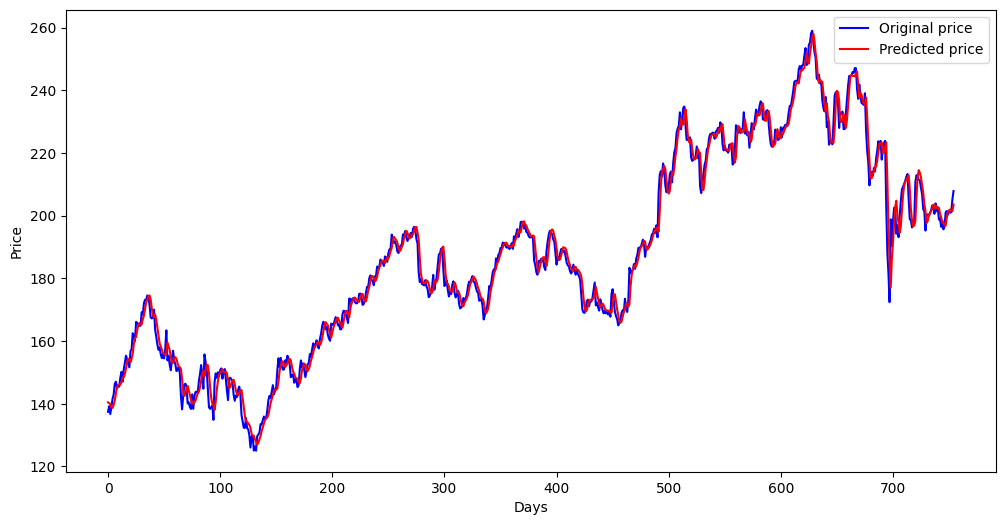

In [148]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(170.0, 250.0)

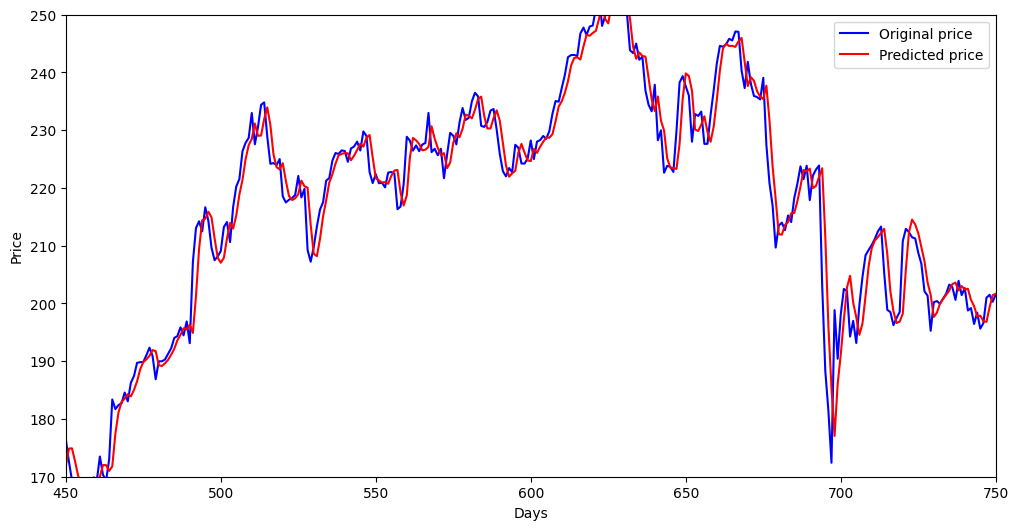

In [150]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(170, 250)

# 10. Model Evaluation

In [156]:
# Mean squared error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [152]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error (MSE): {mse}")

Mean squared error (MSE): 13.708325139572533


In [153]:
# Root mean squared error (RMSE)

In [154]:
rmse = np.sqrt(mse)
print(f"Root mean squared error (MSE): {rmse}")

Root mean squared error (MSE): 3.7024755420627065


In [157]:
# R - squared
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

R-squared: 0.9858847613252406
